In [1]:
import json
with open('transaction-data-adhoc-analysis.json','r') as f:
    data = json.load(f)

In [2]:
import pandas as pd
import numpy as np

transaction_df = pd.DataFrame(data)

transaction_df.loc[:,'transaction_date']=pd.to_datetime(transaction_df.loc[:, 'transaction_date'], format='%Y/%m/%d')

sorted_df = transaction_df.sort_values(by='transaction_date')

sorted_bymonth_df = sorted_df.copy()

sorted_items_month = sorted_bymonth_df.drop(columns=["address","mail","username","birthdate", "sex"])

In [3]:
sorted_items_month.transaction_items = sorted_items_month.transaction_items.str.split(';') 

sorted_items = sorted_items_month.explode('transaction_items')

sorted_items[['items','quantity']]=sorted_items.transaction_items.str.split('(',expand=True)

sorted_items["quantity"]=sorted_items["quantity"].str.replace("x", "")

sorted_items["quantity"]=sorted_items["quantity"].str.replace(")", "").astype(int)

sorted_items.head()

C:\Users\Aries Dino\AppData\Local\Temp\ipykernel_29860\1474026520.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sorted_items["quantity"]=sorted_items["quantity"].str.replace(")", "").astype(int)


,name,transaction_items,transaction_value,transaction_date,items,quantity
3774,Robert Johnson,"HealthyKid 3+,Gummy Vitamins,(x3)",12460,2022-01-01,"HealthyKid 3+,Gummy Vitamins,",3
3774,Robert Johnson,"HealthyKid 3+,Nutrional Milk,(x4)",12460,2022-01-01,"HealthyKid 3+,Nutrional Milk,",4
11988,Emma Edwards,"Candy City,Orange Beans,(x3)",597,2022-01-01,"Candy City,Orange Beans,",3
3210,Jennifer Baker,"Exotic Extras,Kimchi and Seaweed,(x4)",3196,2022-01-01,"Exotic Extras,Kimchi and Seaweed,",4
11973,Sharon Weaver,"HealthyKid 3+,Nutrional Milk,(x2)",5980,2022-01-01,"HealthyKid 3+,Nutrional Milk,",2


In [4]:
Jan_items = sorted_items.loc[(sorted_items['transaction_date'] >= '2022-01-01')
                     & (sorted_items['transaction_date'] < '2022-02-01')]

Feb_items = sorted_items.loc[(sorted_items['transaction_date'] >= '2022-02-01')
                     & (sorted_items['transaction_date'] < '2022-03-01')]

Mar_items = sorted_items.loc[(sorted_items['transaction_date'] >= '2022-03-01')
                     & (sorted_items['transaction_date'] < '2022-04-01')]

Apr_items = sorted_items.loc[(sorted_items['transaction_date'] >= '2022-04-01')
                     & (sorted_items['transaction_date'] < '2022-05-01')]

May_items = sorted_items.loc[(sorted_items['transaction_date'] >= '2022-05-01')
                     & (sorted_items['transaction_date'] < '2022-06-01')]

June_items = sorted_items.loc[(sorted_items['transaction_date'] >= '2022-06-01')
                     & (sorted_items['transaction_date'] < '2022-07-01')]

In [5]:
Jan_item_quant = Jan_items.groupby(["items"]).quantity.sum().reset_index()
Jan_item_quant = Jan_item_quant.rename({'quantity': 'Jan quant'}, axis=1)

Feb_item_quant = Feb_items.groupby(["items"]).quantity.sum().reset_index()
Feb_item_quant = Feb_item_quant.rename({'quantity': 'Feb quant'}, axis=1)
Feb_item_quant2 = Feb_item_quant.drop(columns = ["items"])

Mar_item_quant = Mar_items.groupby(["items"]).quantity.sum().reset_index()
Mar_item_quant = Mar_item_quant.rename({'quantity': 'Mar quant'}, axis=1)
Mar_item_quant2 = Mar_item_quant.drop(columns = ["items"])

Apr_item_quant = Apr_items.groupby(["items"]).quantity.sum().reset_index()
Apr_item_quant = Apr_item_quant.rename({'quantity': 'Apr quant'}, axis=1)
Apr_item_quant2 = Apr_item_quant.drop(columns = ["items"])

May_item_quant = May_items.groupby(["items"]).quantity.sum().reset_index()
May_item_quant = May_item_quant.rename({'quantity': 'May quant'}, axis=1)
May_item_quant2 = May_item_quant.drop(columns = ["items"])

June_item_quant = June_items.groupby(["items"]).quantity.sum().reset_index()
June_item_quant = June_item_quant.rename({'quantity': 'June quant'}, axis=1)
June_item_quant2 = June_item_quant.drop(columns = ["items"])

## Breakdown of Items

In [6]:
items = [Jan_item_quant,Feb_item_quant2,Mar_item_quant2,Apr_item_quant2,May_item_quant2,June_item_quant2]
items_quantity = pd.concat(items, axis=1, join='inner')
items_quantity

,items,Jan quant,Feb quant,Mar quant,Apr quant,May quant,June quant
0,"Candy City,Gummy Worms,",9559,9996,9986,10043,9801,9934
1,"Candy City,Orange Beans,",9774,10037,9611,9914,9964,10106
2,"Exotic Extras,Beef Chicharon,",9665,10001,9816,9890,10028,9902
3,"Exotic Extras,Kimchi and Seaweed,",9676,9949,9967,9921,9773,10104
4,"HealthyKid 3+,Gummy Vitamins,",9681,9980,10145,9842,9948,9980
5,"HealthyKid 3+,Nutrional Milk,",9727,9691,9876,9786,9881,9767
6,"HealthyKid 3+,Yummy Vegetables,",9959,10256,9896,9861,9735,9722


Text(0.5, 1.0, 'Breakdown of Quantity of Items per month')

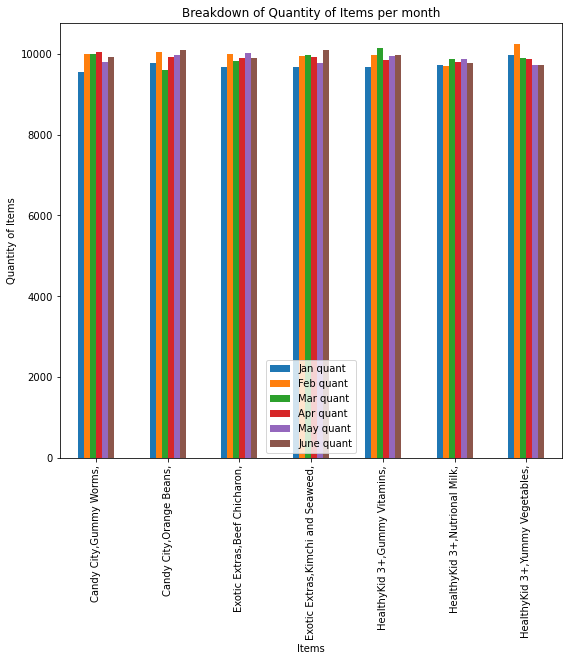

In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import table
columns2 = ["Jan quant","Feb quant","Mar quant", "Apr quant", "May quant", "June quant"]

items_quantity.plot(x="items", y=columns2, kind="bar", figsize=(9, 8))
plt.ylabel("Quantity of Items")
plt.xlabel("Items")
plt.title("Breakdown of Quantity of Items per month")

In [8]:
CandyCity_GummyWorms = list(items_quantity.loc[0])
CandyCity_GummyWorms.remove(CandyCity_GummyWorms[0])

CandyCity_OrangeBeans = list(items_quantity.loc[1])
CandyCity_OrangeBeans.remove(CandyCity_OrangeBeans[0])

ExoticExtras_BeefChicharon = list(items_quantity.loc[2])
ExoticExtras_BeefChicharon.remove(ExoticExtras_BeefChicharon[0])

ExoticExtras_KimchiAndSeaweed = list(items_quantity.loc[3])
ExoticExtras_KimchiAndSeaweed.remove(ExoticExtras_KimchiAndSeaweed[0])

HealthyKid3_GummyVitamins = list(items_quantity.loc[4])
HealthyKid3_GummyVitamins.remove(HealthyKid3_GummyVitamins[0])

HealthyKid3_NutritionalMilk = list(items_quantity.loc[5])
HealthyKid3_NutritionalMilk.remove(HealthyKid3_NutritionalMilk[0])

HealthyKid3_YummyVegetables = list(items_quantity.loc[6])
HealthyKid3_YummyVegetables.remove(HealthyKid3_YummyVegetables[0])

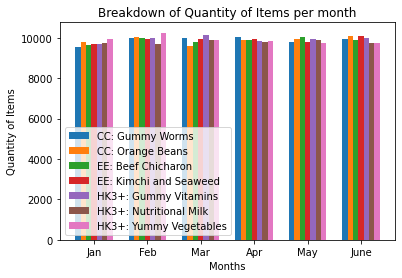

In [9]:
columns3 = ["Jan","Feb","Mar","Apr","May","June"]
x_graph = columns3
y0 = CandyCity_GummyWorms
y1 = CandyCity_OrangeBeans
y2 = ExoticExtras_BeefChicharon
y3 = ExoticExtras_KimchiAndSeaweed
y4 = HealthyKid3_GummyVitamins
y5 = HealthyKid3_NutritionalMilk
y6 = HealthyKid3_YummyVegetables
  
X_axis = np.arange(len(x_graph))
  
plt.bar(X_axis - 0.3, y0, 0.1, label = 'CC: Gummy Worms')
plt.bar(X_axis - 0.2, y1, 0.1, label = 'CC: Orange Beans')
plt.bar(X_axis - 0.1, y2, 0.1, label = 'EE: Beef Chicharon')
plt.bar(X_axis, y3, 0.1, label = 'EE: Kimchi and Seaweed')
plt.bar(X_axis + 0.1, y4, 0.1, label = 'HK3+: Gummy Vitamins')
plt.bar(X_axis + 0.2, y5, 0.1, label = 'HK3+: Nutritional Milk')
plt.bar(X_axis + 0.3, y6, 0.1, label = 'HK3+: Yummy Vegetables')
  
plt.xticks(X_axis, x_graph)
plt.xlabel("Months")
plt.ylabel("Quantity of Items")
plt.title("Breakdown of Quantity of Items per month")
plt.legend(loc=3)
plt.show()

In [18]:
items_quantity3 = items_quantity.copy()

items_quantity3.loc[items_quantity3["items"]=="Candy City,Gummy Worms,",["items"]]="Candy City"
items_quantity3.loc[items_quantity3["items"]=="Candy City,Orange Beans,",["items"]]="Candy City"
items_quantity3.loc[items_quantity3["items"]=="Exotic Extras,Kimchi and Seaweed,",["items"]]="Exotic Extras"
items_quantity3.loc[items_quantity3["items"]=="Exotic Extras,Beef Chicharon,",["items"]]="Exotic Extras"
items_quantity3.loc[items_quantity3["items"]=="HealthyKid 3+,Gummy Vitamins,",["items"]]="HealthyKid 3+"
items_quantity3.loc[items_quantity3["items"]=="HealthyKid 3+,Nutrional Milk,",["items"]]="HealthyKid 3+"
items_quantity3.loc[items_quantity3["items"]=="HealthyKid 3+,Yummy Vegetables,",["items"]]="HealthyKid 3+"

type_of_items = items_quantity3.groupby(["items"]).sum().reset_index()

type_of_items

,items,Jan quant,Feb quant,Mar quant,Apr quant,May quant,June quant,Amount
0,Candy City,19333,20033,19597,19957,19765,20040,349
1,Exotic Extras,19341,19950,19783,19811,19801,20006,2098
2,HealthyKid 3+,29367,29927,29917,29489,29564,29469,3990


Text(0.5, 1.0, 'Breakdown of Quantity of Type of Items per month')

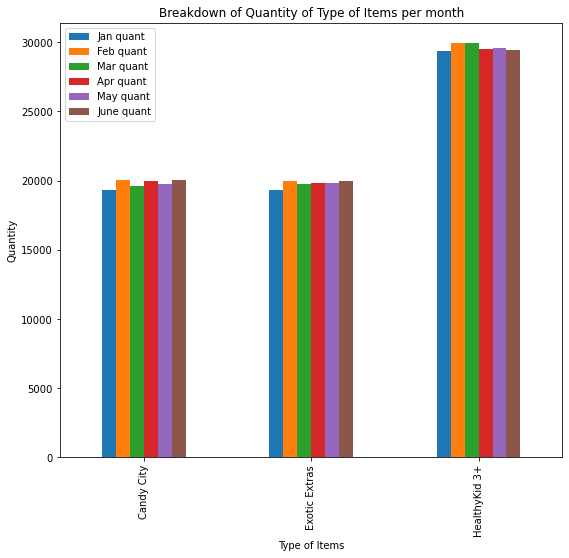

In [19]:
type_of_items.plot(x="items", y=columns2, kind="bar", figsize=(9, 8))
plt.ylabel("Quantity")
plt.xlabel("Type of Items")
plt.title("Breakdown of Quantity of Type of Items per month")

## Breakdown of Sales

In [16]:
CCGW = sorted_items[sorted_items["transaction_items"]=="Candy City,Gummy Worms,(x1)"]
minCCGW = CCGW.min()
CCGW_amt = minCCGW["transaction_value"]

CCOB = sorted_items[sorted_items["transaction_items"]=="Candy City,Orange Beans,(x1)"]
minCCOB = CCOB.min()
CCOB_amt = minCCOB["transaction_value"]

EEBC = sorted_items[sorted_items["transaction_items"]=="Exotic Extras,Beef Chicharon,(x1)"]
minEEBC = EEBC.min()
EEBC_amt = minEEBC["transaction_value"]

EEKC = sorted_items[sorted_items["transaction_items"]=="Exotic Extras,Kimchi and Seaweed,(x1)"]
minEEKC = EEKC.min()
EEKC_amt = minEEKC["transaction_value"]

HKGW = sorted_items[sorted_items["transaction_items"]=="HealthyKid 3+,Gummy Vitamins,(x1)"]
minHKGW = HKGW.min()
HKGW_amt = minHKGW["transaction_value"]

HKNM = sorted_items[sorted_items["transaction_items"]=="HealthyKid 3+,Nutrional Milk,(x1)"]
minHKNM = HKNM.min()
HKNM_amt = minHKNM["transaction_value"]

HKYV = sorted_items[sorted_items["transaction_items"]=="HealthyKid 3+,Yummy Vegetables,(x1)"]
minHKYV = HKYV.min()
HKYV_amt = minHKYV["transaction_value"]

amount = [CCGW_amt,CCOB_amt,EEBC_amt,EEKC_amt,HKGW_amt,HKNM_amt,HKYV_amt]

items_quantity["Amount"] = amount

items_quantity

,items,Jan quant,Feb quant,Mar quant,Apr quant,May quant,June quant,Amount
0,"Candy City,Gummy Worms,",9559,9996,9986,10043,9801,9934,150
1,"Candy City,Orange Beans,",9774,10037,9611,9914,9964,10106,199
2,"Exotic Extras,Beef Chicharon,",9665,10001,9816,9890,10028,9902,1299
3,"Exotic Extras,Kimchi and Seaweed,",9676,9949,9967,9921,9773,10104,799
4,"HealthyKid 3+,Gummy Vitamins,",9681,9980,10145,9842,9948,9980,1500
5,"HealthyKid 3+,Nutrional Milk,",9727,9691,9876,9786,9881,9767,1990
6,"HealthyKid 3+,Yummy Vegetables,",9959,10256,9896,9861,9735,9722,500


In [17]:
items_quantity5 = items_quantity.copy()

items_quantity5["Jan_sales"] = items_quantity5["Jan quant"] * items_quantity5["Amount"]

items_quantity5["Feb_sales"] = items_quantity5["Feb quant"] * items_quantity5["Amount"]

items_quantity5["Mar_sales"] = items_quantity5["Mar quant"] * items_quantity5["Amount"]

items_quantity5["Apr_sales"] = items_quantity5["Apr quant"] * items_quantity5["Amount"]

items_quantity5["May_sales"] = items_quantity5["May quant"] * items_quantity5["Amount"]

items_quantity5["June_sales"] = items_quantity5["June quant"] * items_quantity5["Amount"]

Sales = items_quantity5.drop(columns = ["Jan quant","Feb quant","Mar quant","Apr quant","May quant",
                                        "June quant","Amount"])

Sales

,items,Jan_sales,Feb_sales,Mar_sales,Apr_sales,May_sales,June_sales
0,"Candy City,Gummy Worms,",1433850,1499400,1497900,1506450,1470150,1490100
1,"Candy City,Orange Beans,",1945026,1997363,1912589,1972886,1982836,2011094
2,"Exotic Extras,Beef Chicharon,",12554835,12991299,12750984,12847110,13026372,12862698
3,"Exotic Extras,Kimchi and Seaweed,",7731124,7949251,7963633,7926879,7808627,8073096
4,"HealthyKid 3+,Gummy Vitamins,",14521500,14970000,15217500,14763000,14922000,14970000
5,"HealthyKid 3+,Nutrional Milk,",19356730,19285090,19653240,19474140,19663190,19436330
6,"HealthyKid 3+,Yummy Vegetables,",4979500,5128000,4948000,4930500,4867500,4861000


Text(0.5, 1.0, 'Breakdown of Sales per Item per month')

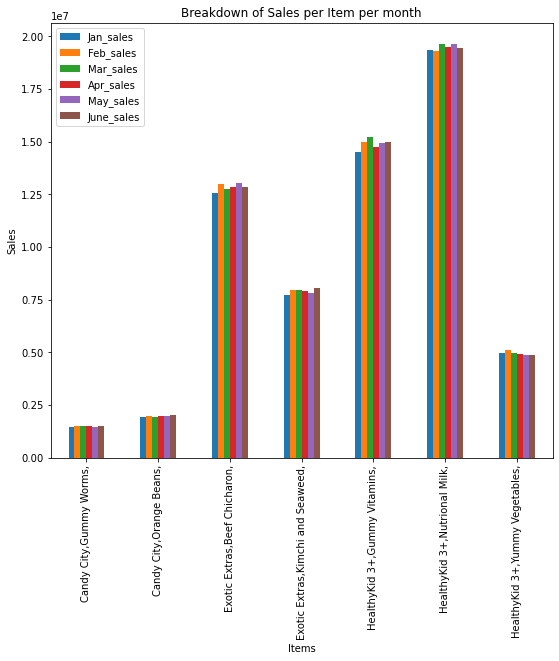

In [13]:
columns5 = ["Jan_sales","Feb_sales","Mar_sales", "Apr_sales", "May_sales", "June_sales"]

Sales.plot(x="items", y=columns5, kind="bar", figsize=(9, 8))
plt.ylabel("Sales")
plt.xlabel("Items")
plt.title("Breakdown of Sales per Item per month")

In [14]:
Sales2 = Sales.copy()
Sales2['Total Sales per item'] = Sales2.sum(axis=1)
Total_Sales_per_month = Sales2.sum(axis=0)

Monthly_Sales_list = ["Monthly_Sales",Total_Sales_per_month[1],Total_Sales_per_month[2],Total_Sales_per_month[3],
                      Total_Sales_per_month[4],Total_Sales_per_month[5],Total_Sales_per_month[6],
                     Total_Sales_per_month[7]]

Sales3 = Sales2.copy()
Sales3.loc[7]=Monthly_Sales_list
Sales3

C:\Users\Aries Dino\AppData\Local\Temp\ipykernel_29860\258703240.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Sales2['Total Sales per item'] = Sales2.sum(axis=1)


,items,Jan_sales,Feb_sales,Mar_sales,Apr_sales,May_sales,June_sales,Total Sales per item
0,"Candy City,Gummy Worms,",1433850,1499400,1497900,1506450,1470150,1490100,8897850
1,"Candy City,Orange Beans,",1945026,1997363,1912589,1972886,1982836,2011094,11821794
2,"Exotic Extras,Beef Chicharon,",12554835,12991299,12750984,12847110,13026372,12862698,77033298
3,"Exotic Extras,Kimchi and Seaweed,",7731124,7949251,7963633,7926879,7808627,8073096,47452610
4,"HealthyKid 3+,Gummy Vitamins,",14521500,14970000,15217500,14763000,14922000,14970000,89364000
5,"HealthyKid 3+,Nutrional Milk,",19356730,19285090,19653240,19474140,19663190,19436330,116868720
6,"HealthyKid 3+,Yummy Vegetables,",4979500,5128000,4948000,4930500,4867500,4861000,29714500
7,Monthly_Sales,62522565,63820403,63943846,63420965,63740675,63704318,381152772
